This project explores various machine learning models to predict passenger survival on the Titanic using the famous Titanic dataset. It includes data preprocessing, feature engineering, model training, and evaluation across Decision Trees, Bagging, Random Forests, and Gradient Boosting.

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [70]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [71]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [72]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [73]:
# Count null values
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

**Fill missing values**

In [74]:
# Fill missing values in "Age".
titanic_df = titanic_df.fillna({'Age': titanic_df['Age'].median()})

titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

**Select Relevant Variables and Split the Data**

In [75]:
# Select relavent features
features = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
target = titanic_df['Survived']

# Split the data into training, development and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


**Train a Decision Tree**

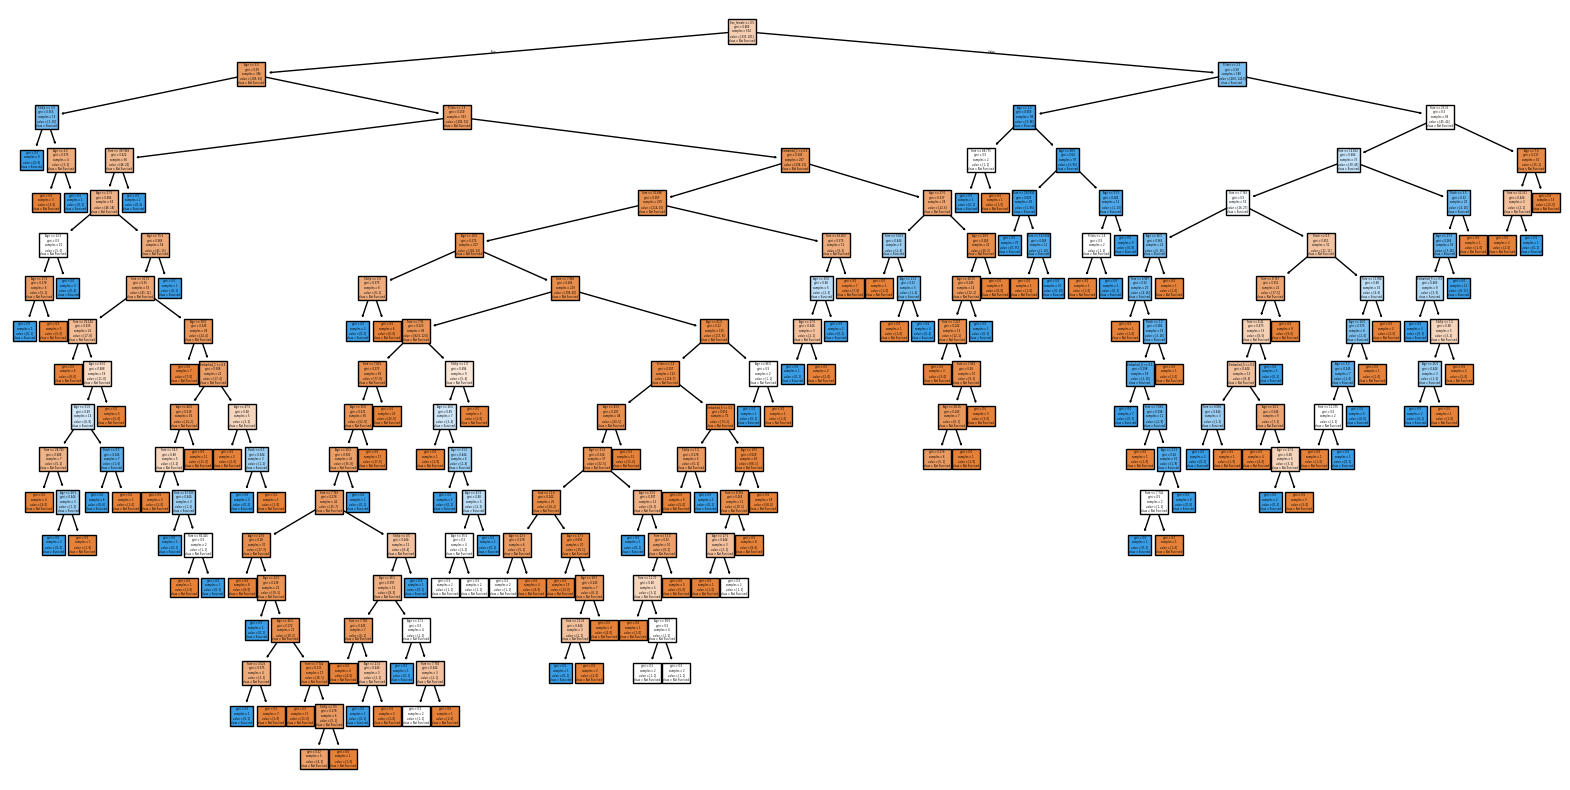

In [76]:
# Train the decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features.columns, class_names=['Not Survived', 'Survived'])
plt.show()

**Compute Model Accuracy on the Development Set**

In [77]:
# Predict on development set
y_dev_predict = clf.predict(X_dev)
dev_accuracy = accuracy_score(Y_dev, y_dev_predict)
print(f"Development Set Accuracy: {dev_accuracy}")

Development Set Accuracy: 0.6910112359550562


**Experiment with Different max_depth Values**

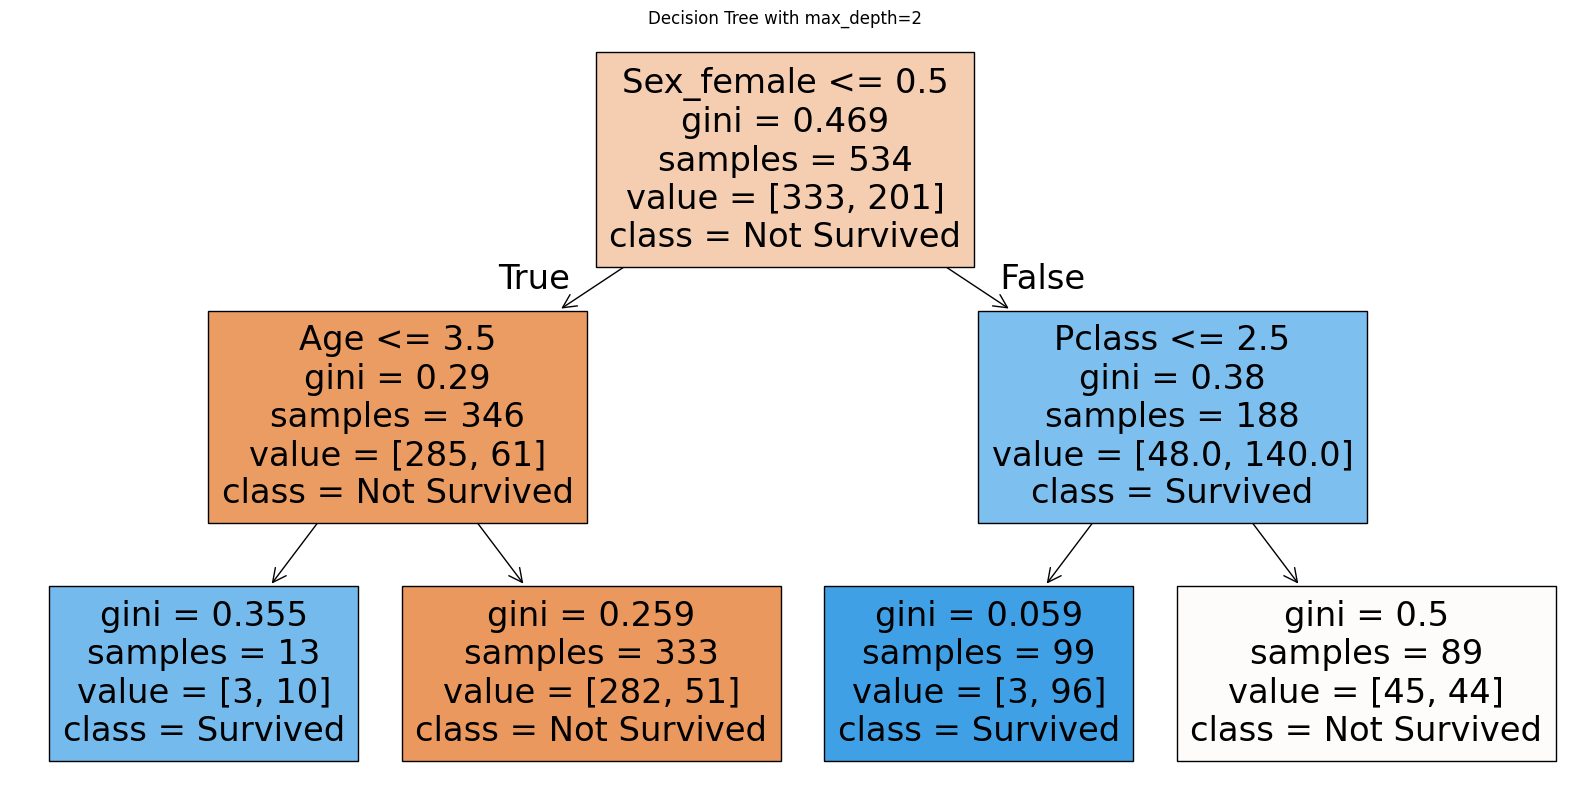

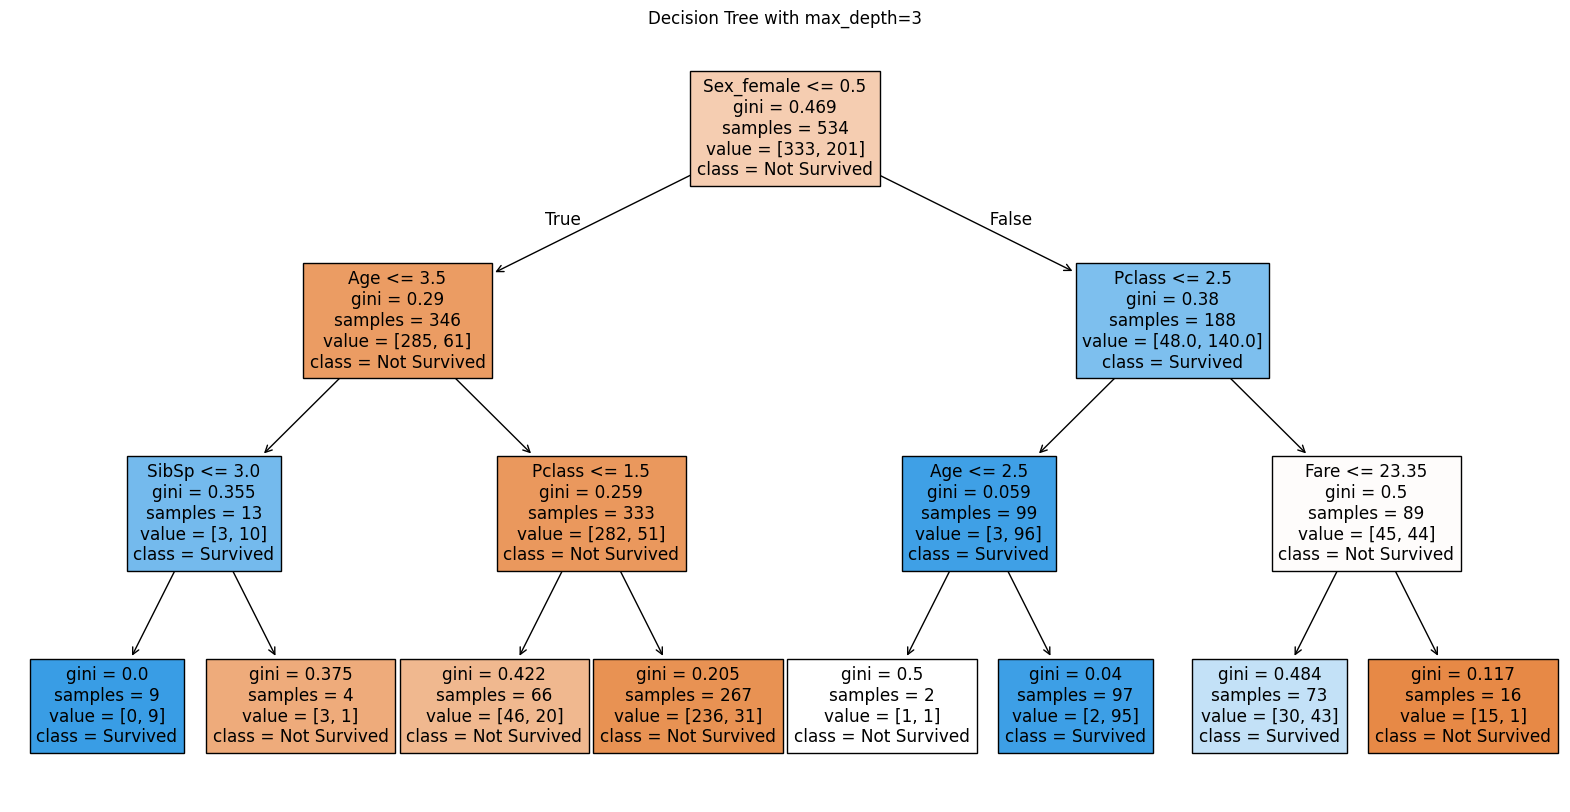

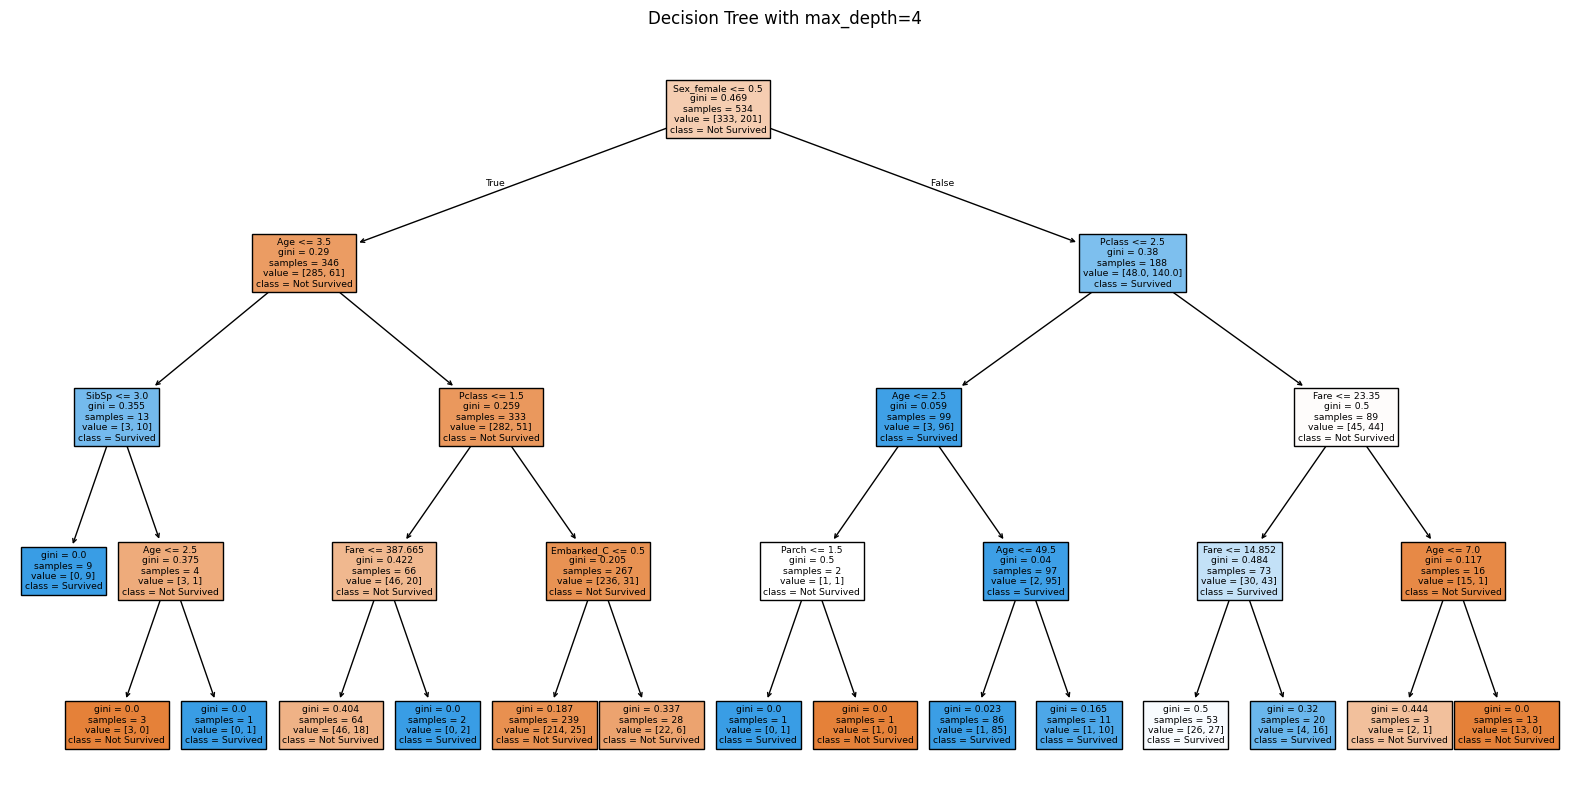

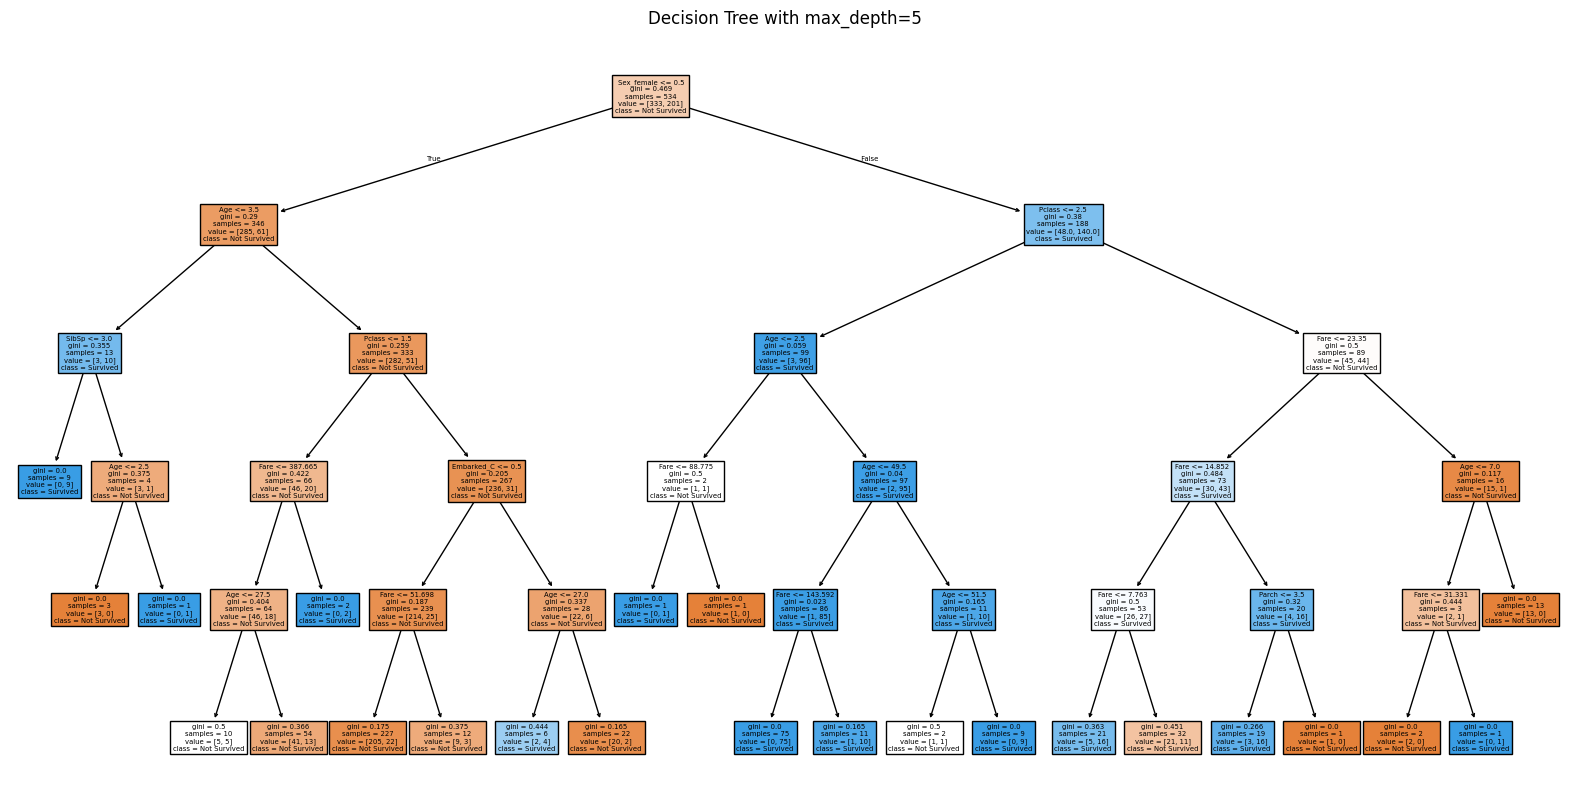

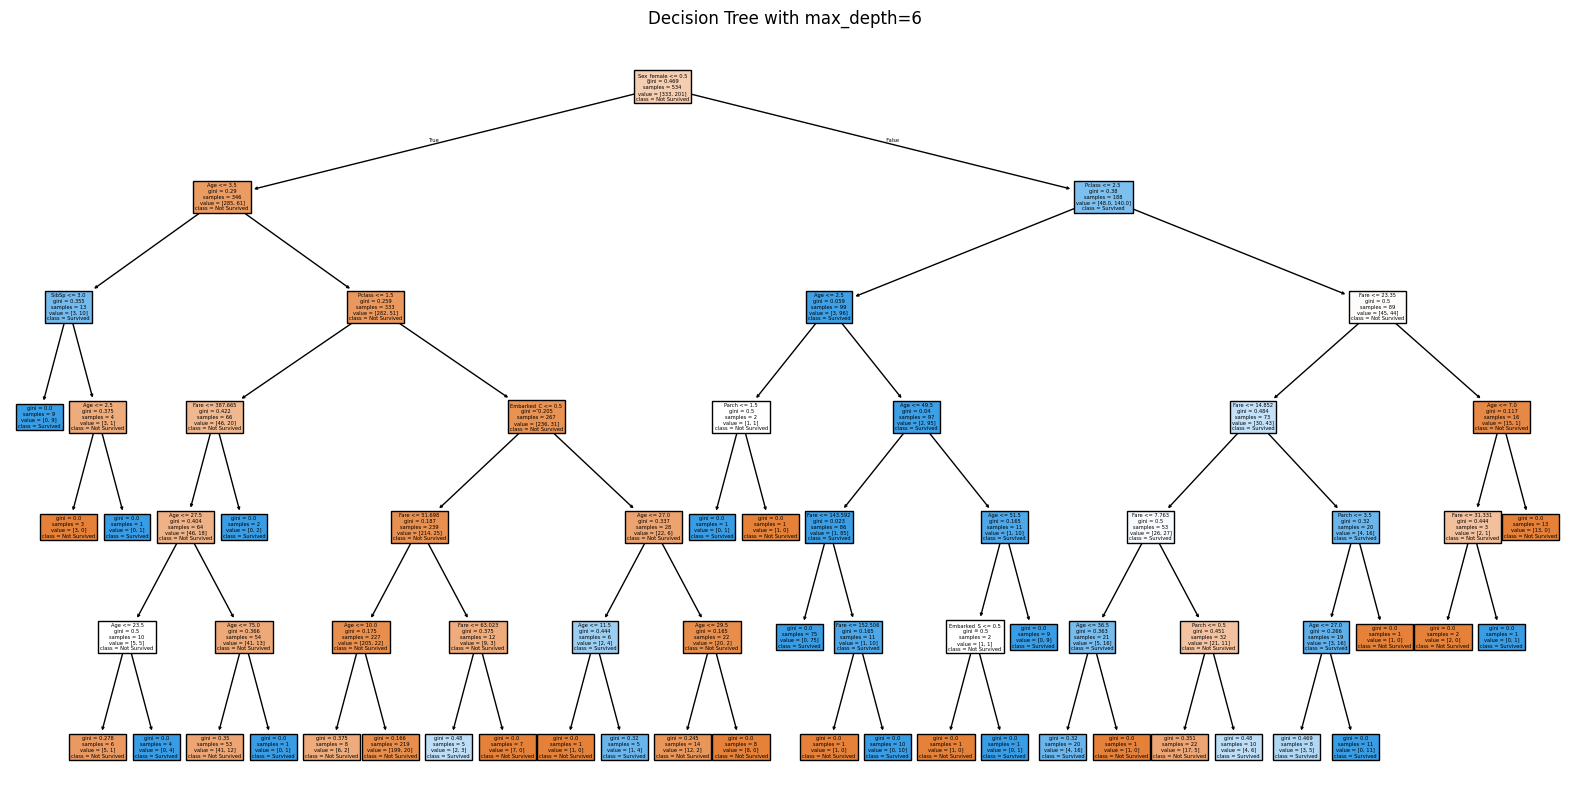

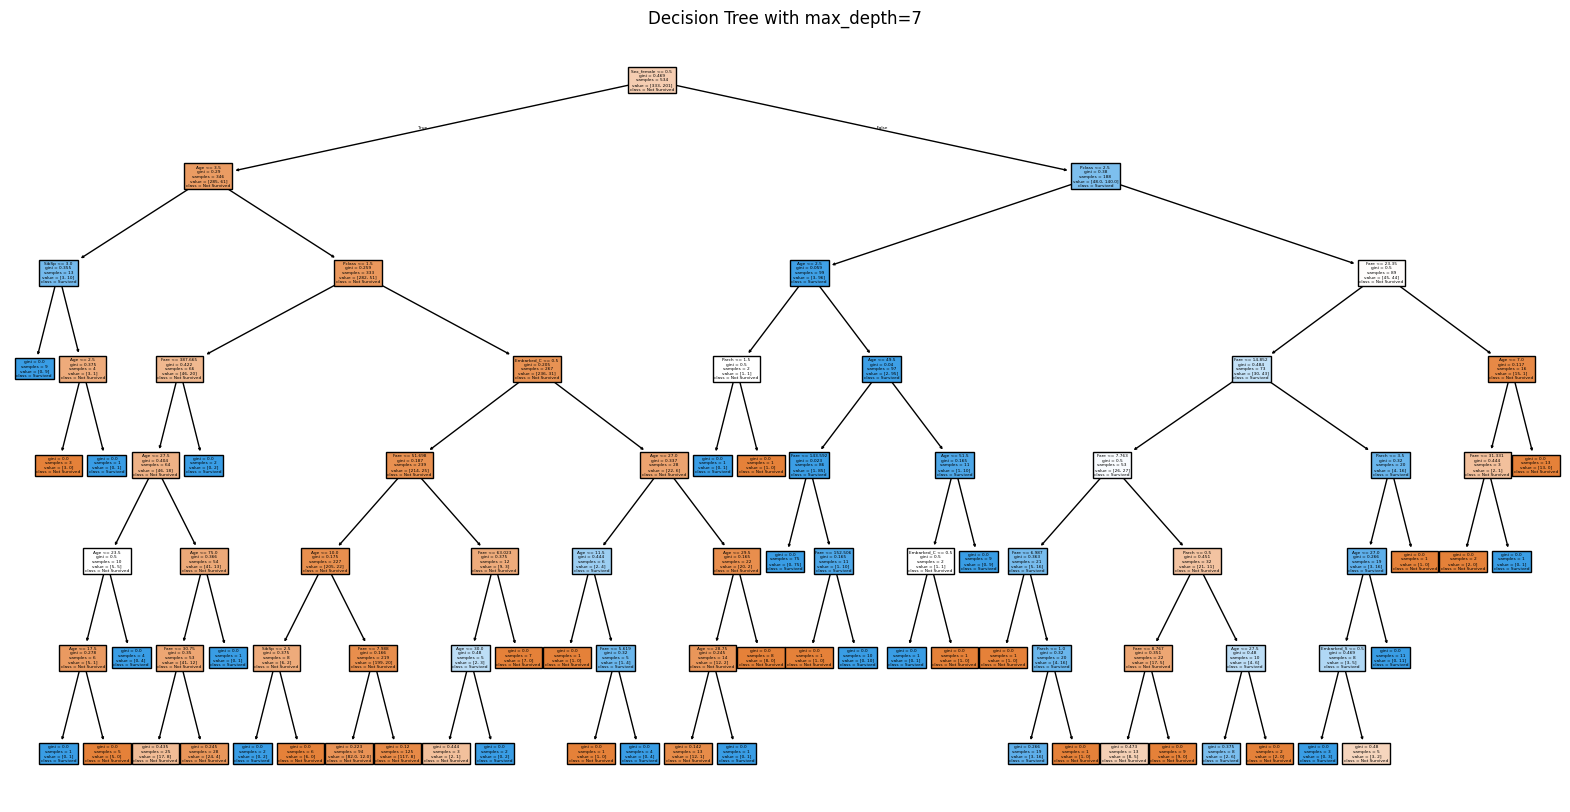

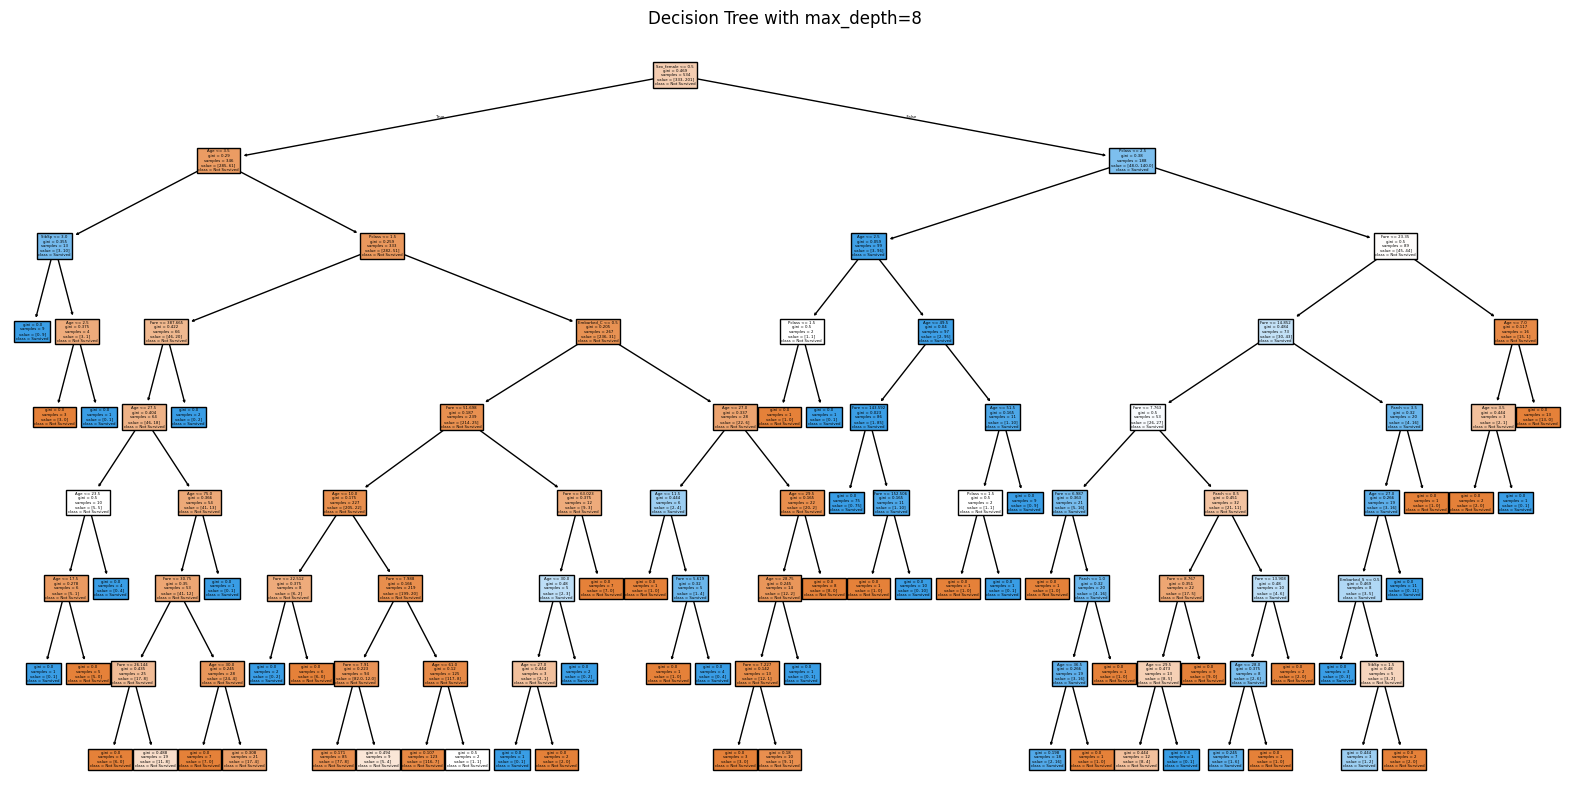

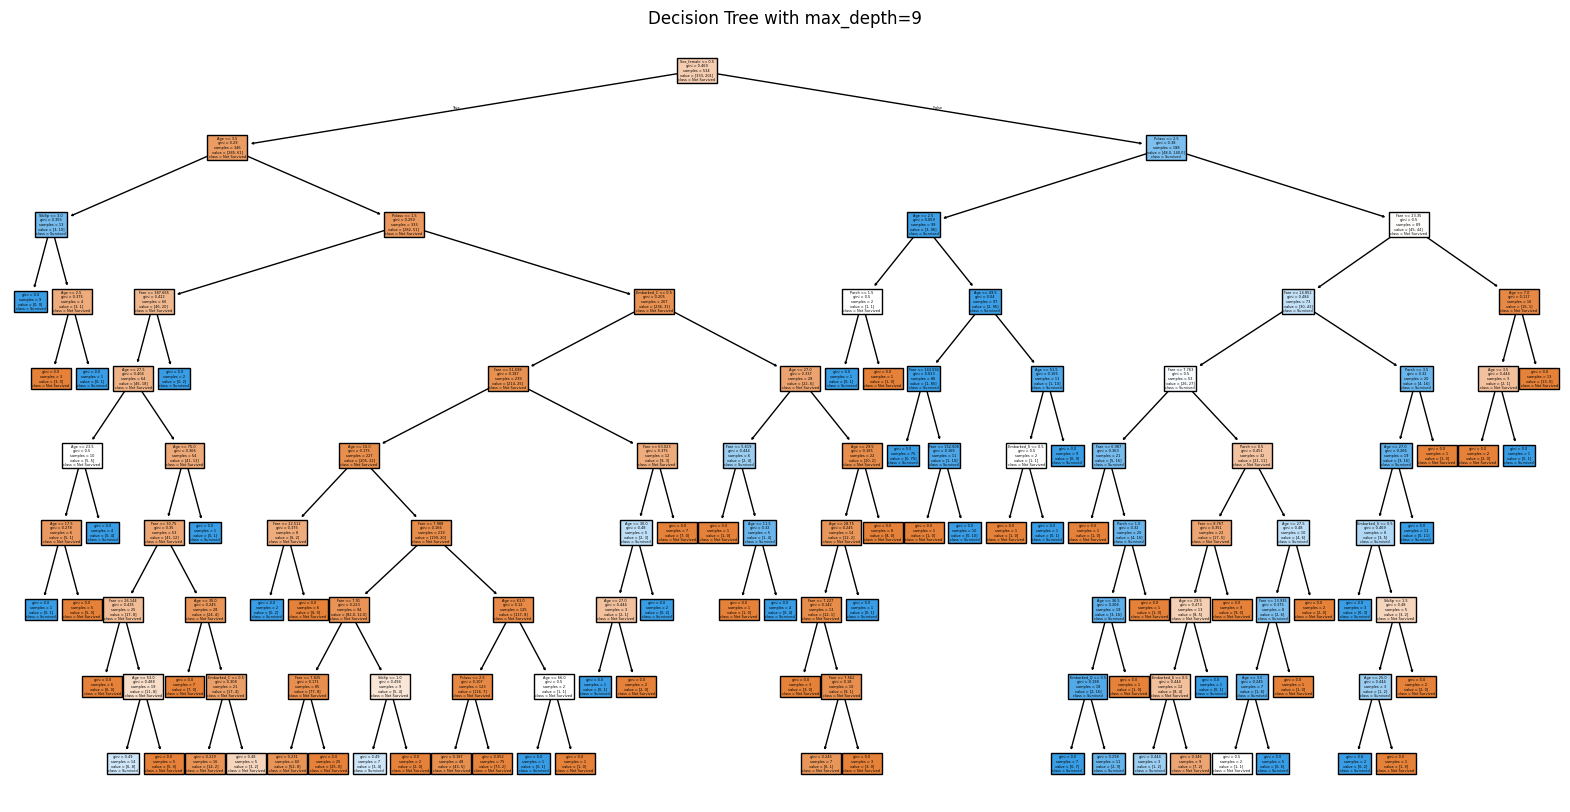

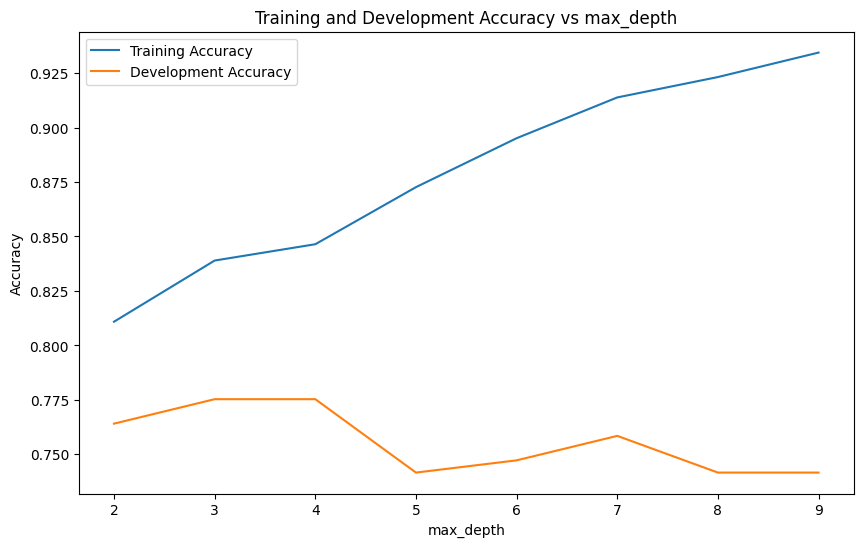

In [78]:
train_accuracies = []
dev_accuracies = []

for depth in range(2, 10):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, Y_train)

    # Training accuracy
    y_train_predict = clf.predict(X_train)
    train_accuracies.append(accuracy_score(Y_train, y_train_predict))

    # Development accuracy
    y_dev_predict = clf.predict(X_dev)
    dev_accuracies.append(accuracy_score(Y_dev, y_dev_predict))

    # Plot the tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, filled=True, feature_names=features.columns, class_names=['Not Survived', 'Survived'])
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), train_accuracies, label='Training Accuracy')
plt.plot(range(2, 10), dev_accuracies, label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Development Accuracy vs max_depth')
plt.show()

**Report Final Model Accuracy on the Test set.**

In [79]:
# Choose the best max_depth based on development accuracy.
best_depth = dev_accuracies.index(max(dev_accuracies)) + 2
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(X_train, Y_train)

# Test set accuracy
y_test_predict = final_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_predict)
print(f"Test Set Accuracy: {test_accuracy}")

Test Set Accuracy: 0.8212290502793296


#### Random Forests Task 

**Bagged Trees**

In [80]:
# Create and train the Bagged Trees model
bagged_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_clf.fit(X_train, Y_train)

# Evaluate the model
y_dev_predict = bagged_clf.predict(X_dev)
bagged_accuracy = accuracy_score(Y_dev, y_dev_predict)
print(f"Bagged Trees Development Set Accuracy: {bagged_accuracy}")

Bagged Trees Development Set Accuracy: 0.7528089887640449


**Random Forest**

In [81]:
# Create and train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)

# Evaluate the model
y_dev_predict = rf_clf.predict(X_dev)
rf_accuracy = accuracy_score(Y_dev, y_dev_predict)
print(f"Random Forest Develoment Set Accuracy: {rf_accuracy}")

# Determine the most important feature
importances = rf_clf.feature_importances_
feature_importances = pd.Series(importances, index=features.columns).sort_values(ascending=False)
print(f"Feature Importance:\n{feature_importances}")

Random Forest Develoment Set Accuracy: 0.7584269662921348
Feature Importance:
Fare          0.244928
Age           0.234451
Sex_male      0.172494
Sex_female    0.133988
Pclass        0.086075
SibSp         0.046770
Parch         0.039545
Embarked_C    0.016151
Embarked_S    0.016068
Embarked_Q    0.009530
dtype: float64


**Boosted Trees**

In [82]:
# Create and train the Boosted Tree model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, Y_train)

# Evaluate the model
y_dev_predict = gb_clf.predict(X_dev)
gb_accuracy = accuracy_score(Y_dev, y_dev_predict)
print(f"Boosted Trees Development Set Accuracy: {gb_accuracy}")

Boosted Trees Development Set Accuracy: 0.8146067415730337


**Tune Parameters for the Best Model**

Tune n_estimators and max_depth for the best-perfoming model.

In [84]:
# Initialize variables
best_accuracy = 0
best_params = {'n_estimators': 0, 'max_depth': 0}

# loop over different values of n_estinmators and max_depth
for n_estimators in range(50, 151, 50):
    for max_depth in range(2, 11):
        # Create and train Model
        rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_clf.fit(X_train, Y_train)

        # Evaluate the model
        y_dev_predict = rf_clf.predict(X_dev)
        accuracy = accuracy_score(Y_dev, y_dev_predict)

        # Update the best accuracy and corresponding parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_estimators'] = n_estimators
            best_params['max_depth'] = max_depth

# Preint the best accuracy and corresponding parameters
print(f"Best Random Forest Development Set Accuracy: {best_accuracy}")
print(f"Best Parameters: n_estimators={best_params["n_estimators"]}, max_dept={best_params["max_depth"]}")


Best Random Forest Development Set Accuracy: 0.8146067415730337
Best Parameters: n_estimators=150, max_dept=5


**Final Model Accuracy on the Test Set**

In [85]:
# Train the final model with the best parameters
final_rf_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
final_rf_clf.fit(X_train, Y_train)

# Test set Accuracy
y_test_perdict = final_rf_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_predict)
print(f"Final Random Forest Test Set Accuracy: {test_accuracy}")

Final Random Forest Test Set Accuracy: 0.8212290502793296
